In [14]:
#!pip install PyGal
#!pip install pycairo
#Homebrew then brew install cairo, py2cairo
import pygal
import pandas as pd
from pygal.style import BlueStyle
from pygal.style import DarkStyle
from pygal.style import NeonStyle
from pygal.style import CleanStyle
from pygal.style import RedBlueStyle
from pygal.style import DarkGreenBlueStyle
#!brew install cairo

In [2]:
#allows us to embed visualizations directly into notebook
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

In [35]:
df = pd.read_csv('coffee-chain.csv')

In [36]:
df.head()

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget Margin,Budget Sales,Budget COGS,Date,Market,State,Area Code,Market Size,Product Type,Product,Type
0,94,130,219,89,36,24,777,100,130,220,90,1/1/10,Central,Colorado,719,Major Market,Coffee,Amaretto,Regular
1,68,107,190,83,39,27,623,80,110,190,80,1/1/10,Central,Colorado,970,Major Market,Coffee,Columbian,Regular
2,101,139,234,95,38,26,821,110,140,240,100,1/1/10,Central,Colorado,970,Major Market,Coffee,Decaf Irish Cream,Decaf
3,30,56,100,44,26,14,623,30,50,80,30,1/1/10,Central,Colorado,303,Major Market,Tea,Green Tea,Regular
4,54,80,134,54,26,15,456,70,90,150,60,1/1/10,Central,Colorado,303,Major Market,Espresso,Caffe Mocha,Regular


In [38]:
#Grouping by Product Type
mean_by_category = df.groupby('Product Type')['Sales'].mean()
#Bar Charts
pyBar = pygal.Bar(fill= True, style = RedBlueStyle)
pyBar.add('Product Sales', mean_by_category)
pyBar.x_labels = mean_by_category.index
pyBar.title = 'Total Sales by Product Type'

In [39]:
display(HTML(base_html.format(
    rendered_chart=pyBar.render(is_unicode=True))))

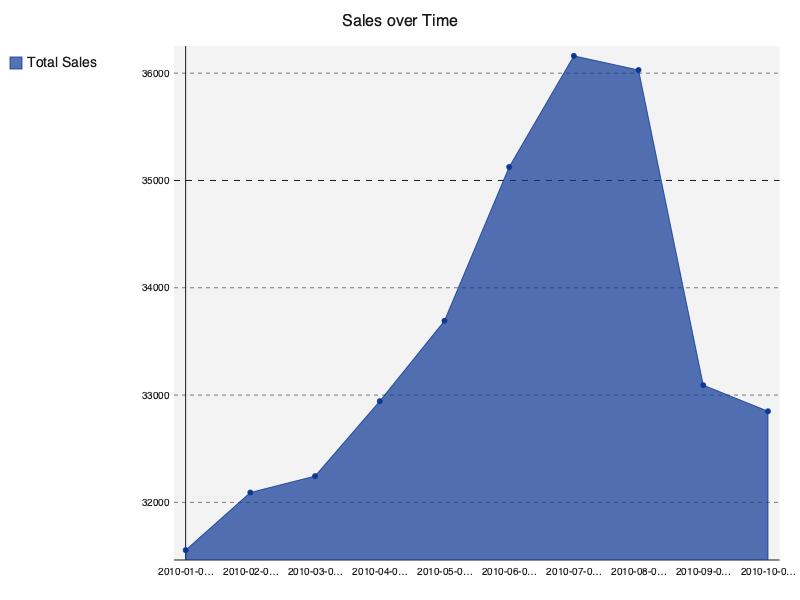

In [37]:
#Line Charts
#Conversion of date column str to datetime
df['Date'] = pd.to_datetime(df['Date'])

#Agregating Data by Date
SalesOverTime=df.groupby('Date')['Sales'].sum()

#Creating line chart
line = pygal.StackedLine(fill = True, style = CleanStyle)
line.title = 'Sales over Time'
line.x_labels = SalesOverTime.index[:10]
line.add('Total Sales', SalesOverTime[:10])

In [34]:
#chart.render_to_file('/tmp/chart.svg')
display(HTML(base_html.format(
    rendered_chart=line.render(is_unicode=True))))